In [11]:
import numpy as np
from numpy.random import choice
from numpy.random import randint
from numpy.random import rand
import matplotlib.pyplot as plt

The Ising model is used to simulate ferromagnetism using Metropolis-Hastings algorithm.  The model consists of a crystal structure where each element is assigned a spin value of +1 or -1. In each iteration the spin of one random element can be changed.
In fact, model has Hibbs distribution:
$$ \pi_{\vec{\sigma}} = \frac{e^{-\beta E(\vec{\sigma})}}{\sum_{\vec{\sigma'}} e^{-\beta E(\vec{\sigma'})}} $$
where σ is the vector of all spins, E is an energy of such configuration and β is 1/T, T - temperature.
But it is very computationally expensive to count such a sum in the denominator. The algorithm is able to simulate this without calculating the sum.  
Here is ​the algorithm:
1) Create a random spin matrix
2) Choose a random element of the matrix
3) Calculate a probability of assigning positive spin to the element (i~k means i and k are neighbors)
$$P(\sigma_k = +1 | \vec{\sigma_{-k}}) = \frac{1}{1 + e^{-2\beta\sum_{i\sim k}\sigma_i}}$$
4) Generate u from Uniform distribution on [0, 1]. If u <= P(...), then element's spin will be +1, else -1.
5) Repeat steps 2 - 4 k times.

In [12]:
# Each element of the crystal structure is assigned a random spin value (+1, -1).
def spin_initialization(n):
    spins = np.empty((n, n)).astype(int)
    for i in range(n):
        for j in range(n):
            spins[i, j] = choice([1, -1])
    return spins


# Calculate the evolution of crystal structure spin values.
def crystal_struct_evolution(spins_initial, n, iter_number, betta):
    spins = spins_initial.copy()
    for i in range(iter_number):
        k = choose_random_element(spins)
        p_positive_spin = p_sigma_k(spins, n, k, betta)
        u = rand()
        if u < p_positive_spin:
            spins[k[0], k[1]] = 1
        else:
            spins[k[0], k[1]] = -1
    return spins


# Choose random element of the crystal structure.
def choose_random_element(spins):
    rows, cols = spins.shape[0], spins.shape[1]
    rand_row_ind, rand_col_ind = randint(0, rows), randint(0, cols)
    return rand_row_ind, rand_col_ind

# Count the element's probability to obtain positive spin.
def p_sigma_k(spins, n, k, betta):
    energy_diff = 0
    if k[0] + 1 < n:
        energy_diff = energy_diff + spins[k[0] + 1, k[1]]
    if k[0] - 1 >= 0:
        energy_diff = energy_diff + spins[k[0] - 1, k[1]]
    if k[1] + 1 < n:
        energy_diff = energy_diff + spins[k[0], k[1] + 1]
    if k[1] - 1 >= 0:
        energy_diff = energy_diff + spins[k[0], k[1] - 1]
    energy_diff = -2 * energy_diff
    p_positive_spin = 1 / (1 + np.exp(betta * energy_diff))
    return p_positive_spin

In [13]:
# Convert the matrix to binary so it can be easily displayed.
def spin_to_bool(spins):
    return (spins + 1) / 2

The crystal structure will consist of 70x70 elements with betta from the array [0.441, 0.8, -1.2]. There will be 100000 iterations.  
If beta is greater than 0.441, the system looks magnetized; if it is smaller, it looks chaotic.

In [14]:
n = 70
betta = [0.441, 0.8, -1.2]
iter_number = 100000

spins = spin_initialization(n)
spins0 = crystal_struct_evolution(spins, n, iter_number, betta[0])
spins1 = crystal_struct_evolution(spins, n, iter_number, betta[1])
spins2 = crystal_struct_evolution(spins, n, iter_number, betta[2])

(-0.5, 69.5, 69.5, -0.5)

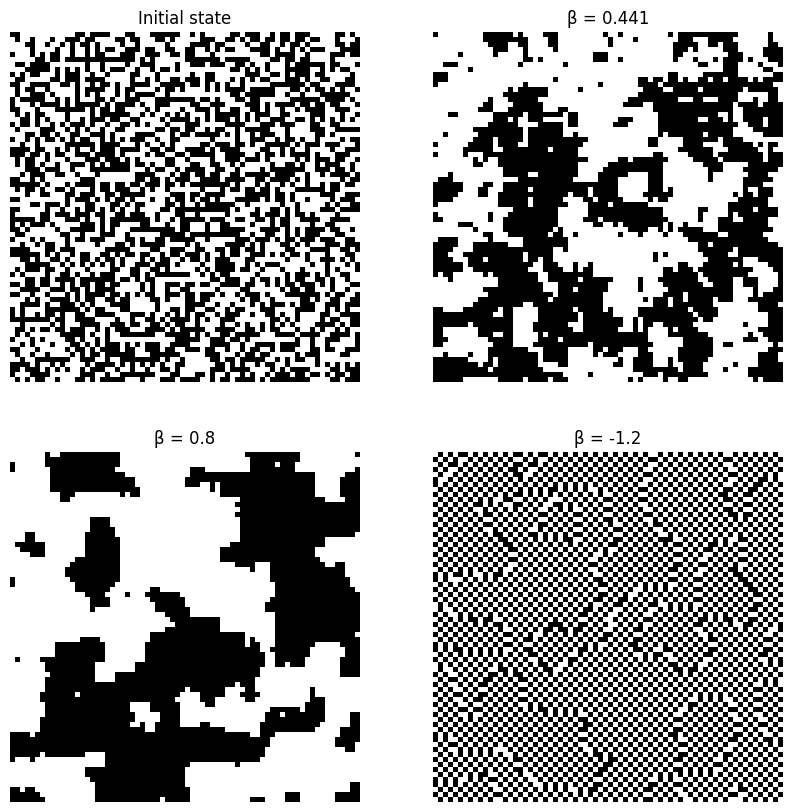

In [15]:
plt.rcParams['figure.figsize'] = [10, 10]
plt.subplot(2, 2, 1), plt.imshow(spin_to_bool(spins), cmap='gray')
plt.title('Initial state', fontsize=12)
plt.axis('off')
plt.subplot(2, 2, 2), plt.imshow(spin_to_bool(spins0), cmap='gray')
plt.title(f'β = {betta[0]}', fontsize=12)
plt.axis('off')
plt.subplot(2, 2, 3), plt.imshow(spin_to_bool(spins1), cmap='gray')
plt.title(f'β = {betta[1]}', fontsize=12)
plt.axis('off')
plt.subplot(2, 2, 4), plt.imshow(spin_to_bool(spins2), cmap='gray')
plt.title(f'β = {betta[2]}', fontsize=12)
plt.axis('off')

With beta equal to 0.8 we can see magnetized areas.